# Examining admission rates

In [1]:
library(haven)
library(data.table)
library(ggplot2)

In [2]:
r = data.table(read_dta('county_year_sex_racehisp_allterm_patot_2000_2014_rates.dta'))

In [3]:
# head(r)

In [4]:
# descriptives raw data
summary(r[, epatoto])

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
     0.0      0.0      0.0    200.2     82.9 500000.0    20630 

In [5]:
adm = r[, .(county, year, epatoto)]
setnames(adm, c('county', 'year', 'adm_rate'))

adm = adm[!is.na(adm_rate)]

table(adm$year)


2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 
2753 2753 2753 2753 2753 2753 2753 2753 2753 2753 2754 2754 2754 2754 2754 

In [6]:
# average admission rate by county
sadm = adm[, .(.N, avg_adm_rate = mean(adm_rate, na.rm=TRUE)), county]

In [7]:
# mean is pretty high, very skew distribution
summary(sadm$avg_adm_rate)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
     0.00      0.92     44.04    200.17    140.36 177000.00 

In [8]:
# 56 counties with rates higher than 1000
table(sadm$avg_adm_rate > 1000)


FALSE  TRUE 
 2698    56 

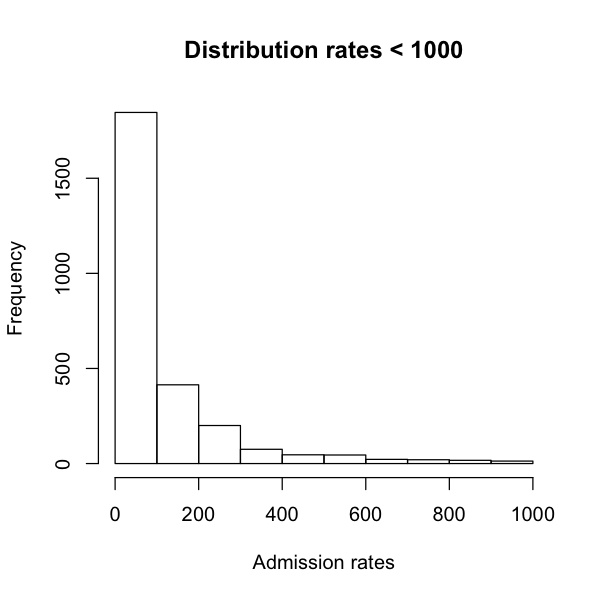

In [9]:
options(repr.plot.width=5, repr.plot.height=5)
hist(sadm[sadm$avg_adm_rate < 1000]$avg_adm_rate,
     main='Distribution rates < 1000', 
    xlab='Admission rates')

In [15]:
# 685 counties with rates of 0
table(sadm$avg_adm_rate==0)


FALSE  TRUE 
 2069   685 

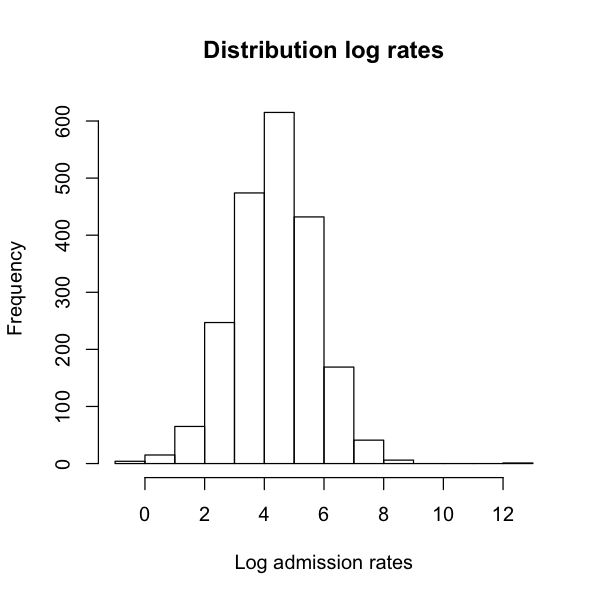

In [16]:
hist(log(sadm$avg_adm_rate), main='Distribution log rates', 
    xlab='Log admission rates')

# Matching with county data

In [17]:
# chetty's data for counties
cov = data.table(read_dta('cty_full_covariates.dta'))

In [18]:
print(nrow(cov))
print(anyDuplicated(cov))

[1] 3138
[1] 0


In [19]:
print(nrow(sadm))
print(anyDuplicated(sadm))

[1] 2754
[1] 0


In [21]:
# merge files
setkey(sadm, county)
setkey(cov, cty)


pcov = cov[sadm]

pcov[avg_adm_rate > 0, log_adm_rate := log(avg_adm_rate)]

Warning message:
“Removed 692 rows containing missing values (geom_point).”

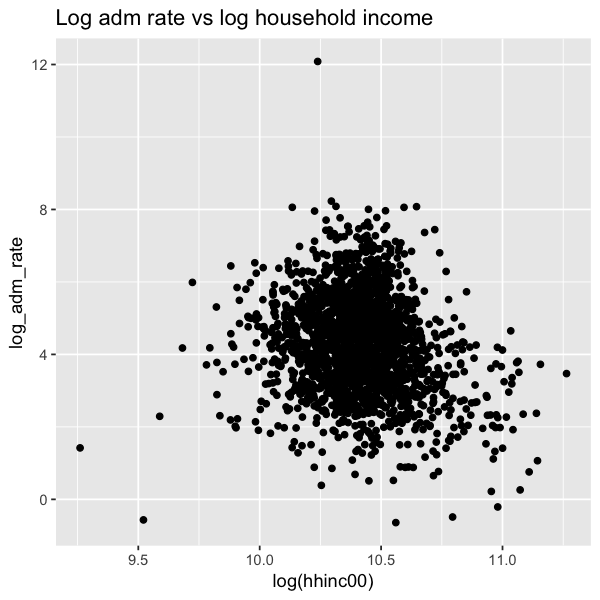

In [22]:
ggplot(pcov, aes(y=log_adm_rate, x=log(hhinc00))) + geom_point() + 
    labs(title='Log adm rate vs log household income')


In [85]:
cor(pcov[, .(log_adm_rate, hhinc00)], use='complete.obs')

,log_adm_rate,hhinc00
log_adm_rate,1.0000000,-0.2036604
hhinc00,-0.2036604,1.0000000


Warning message:
“Removed 692 rows containing missing values (geom_point).”

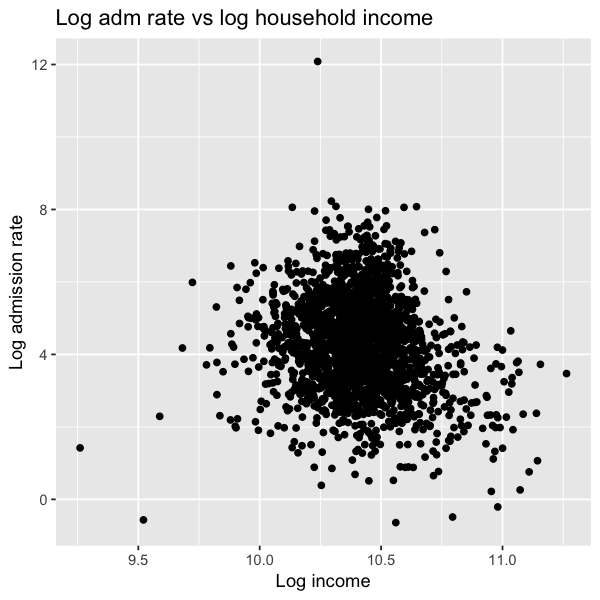

In [27]:
ggplot(pcov, aes(y=log_adm_rate, x=log(hhinc00))) + geom_point() + 
    labs(title='Log adm rate vs log household income', 
        x='Log income', y='Log admission rate')
